<a href="https://colab.research.google.com/github/divyachoubisa/Data-Analysis/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
#from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
#plt.rc("font", size=14)
#plt.rcParams['axes.grid'] = True
#plt.figure(figsize=(6,3))
#plt.gray()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras import models

In [ ]:
data=pd.read_csv("C:/Users/charu/OneDrive/Desktop/Sem 6/Data Science/Data Sets/card_transdata.csv")

In [ ]:
Total_transactions = len(data)
normal = len(data[data.fraud == 0])
fraudulent = len(data[data.fraud == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Trnsactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent Transactions are {}'.format(fraudulent))
print('Percentage of fraud Transactions is {}'.format(fraud_percentage))

Total number of Trnsactions are 1000000
Number of Normal Transactions are 912597
Number of fraudulent Transactions are 87403
Percentage of fraud Transactions is 9.58


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [ ]:
print(min(data.distance_from_home))
print(max(data.distance_from_home))


0.004874385
10632.72367


In [ ]:
#Scaling the amount column
sc = StandardScaler()
amount = data['distance_from_home'].values
data['distance_from_home'] = sc.fit_transform(amount.reshape(-1, 1))
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,0.311140,1.945940,1,1,0,0,0
1,-0.241607,0.175592,1.294219,1,0,0,0,0
2,-0.329369,0.805153,0.427715,1,0,0,1,0
3,-0.372854,5.600044,0.362663,1,1,0,1,0
4,0.268572,0.566486,2.222767,1,1,0,1,0


In [ ]:
data.shape

(1000000, 8)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(1000000, 8)

In [ ]:
X = data.drop('fraud', axis = 1).values #dependent Variable
y = data['fraud'].values #independent Variable

<AxesSubplot:>

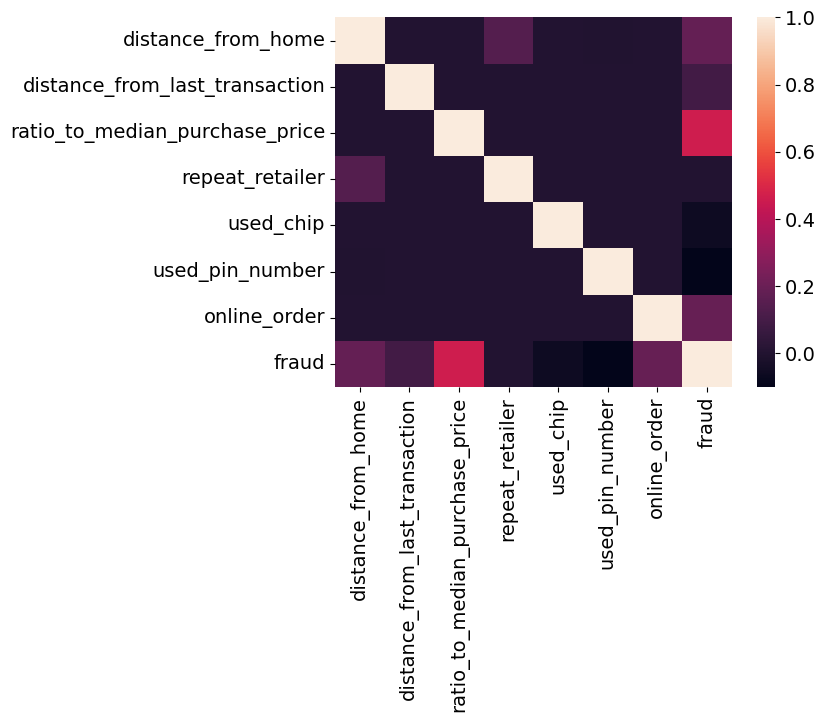

In [ ]:
sns.heatmap(data.corr())

In [ ]:
#splitting into test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [ ]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_pred)))

Accuracy score of the Logistic Regression model is 0.95852


In [ ]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_pred)))

F1 score of the Logistic Regression model is 0.7168368740101577


In [ ]:
matrix=confusion_matrix(y_test,lr_pred)
matrix
#TP #FP
#TN #FN

array([[226504,   1573],
       [  8797,  13126]], dtype=int64)

In [ ]:
new_output=lr.predict([[500, 0.1, 0.123, 0, 1, 1, 0]])
new_output
if(new_output==1):
    print("Fraud")
else:
    print("Genuine")

Fraud
